# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from scipy.stats import poisson

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint

import thinkbayes2
import thinkplot

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


### Fake data

In [6]:
slope = 2
inter = 1
sigma = 0.3

In [7]:
xs = np.linspace(0, 1, 6)

In [8]:
ys = inter + slope * xs + np.random.normal(0, sigma, len(xs))

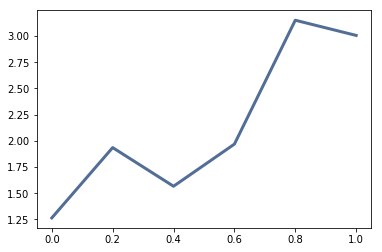

In [9]:
thinkplot.plot(xs, ys)

### Grid algorithm

In [46]:
from scipy.stats import norm

class Regress(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: x, y
        hypo: slope, inter, sigma
        """
        x,y = data
        slope, inter, sigma = hypo
        
        ys = inter + slope*x
        error = y - ys
        
        like = norm(0,sigma).pdf(error)
        
#        can also:
#         like = norm(ys, sigma).pdf(y)
        
        return like

In [47]:
params = np.linspace(-4, 4, 21)

In [48]:
sigmas = np.linspace(0.1, 2, 20)

In [49]:
from itertools import product
hypos = product(params, params, sigmas)

In [50]:
suite = Regress(hypos);

In [51]:
for data in zip(xs, ys):
    suite.Update(data)

In [52]:
suite.Total()

1.000000000000002

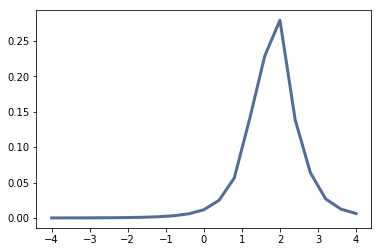

In [53]:
thinkplot.Pdf(suite.Marginal(0))

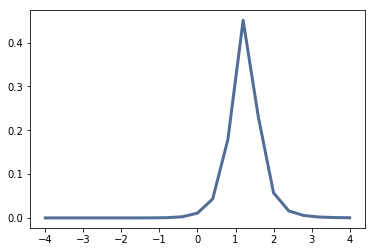

In [54]:
thinkplot.Pdf(suite.Marginal(1))

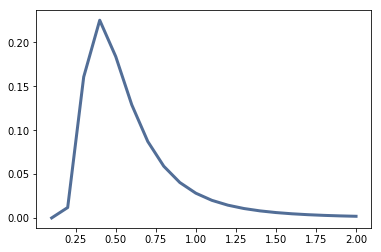

In [55]:
thinkplot.Pdf(suite.Marginal(2))

### MCMC

Implement this model using MCMC

In [ ]:
# Solution goes here